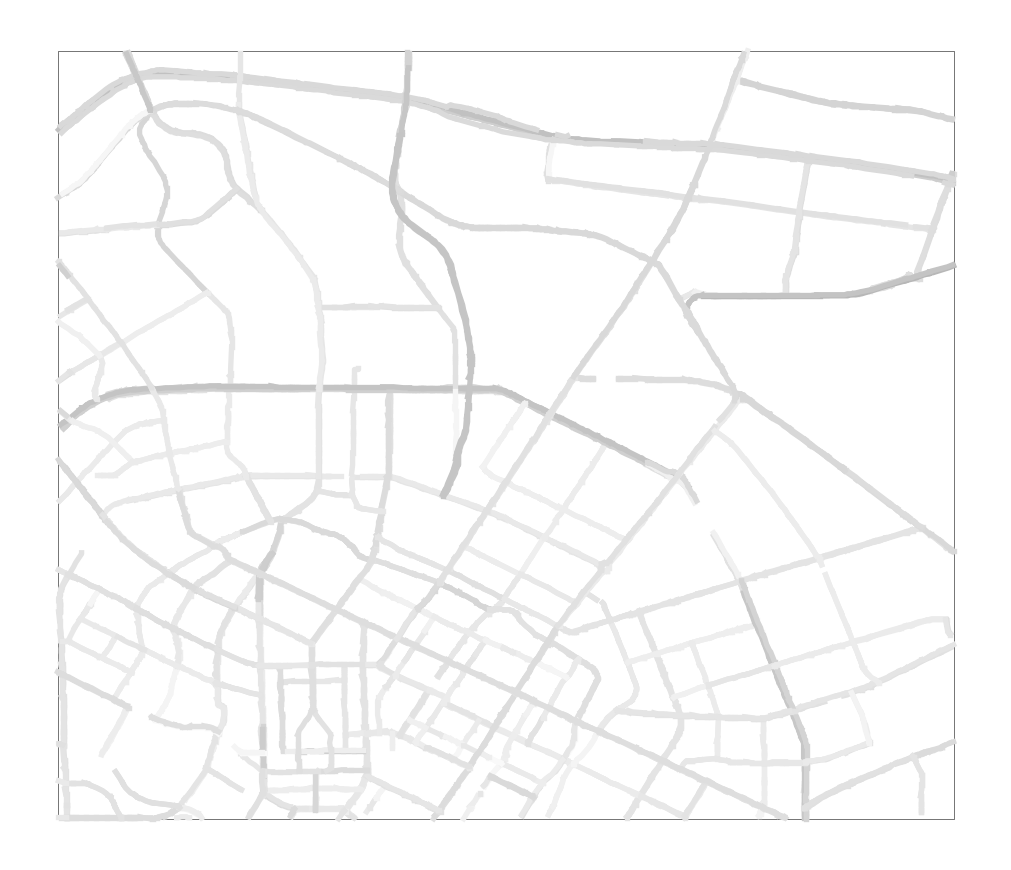

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import MultiLineString
from shapely.wkt import dumps, loads

long_lowerbound = 104.0402
lati_lowerbound = 30.6516
long_upperbound = 104.1298
lati_upperbound = 30.7284

Newdf = pd.DataFrame([],columns = ['ID','Longitude','Latitude','LineN'])


with open('../Data/Section_201810192021/road_boundary.txt','r',encoding = 'utf-8') as f:
    data = f.readlines()
    for i in range(len(data)-1):
        listdata = data[i+1].strip('\n').split('\t')
        MLS = loads(listdata[2])
        for n,g in enumerate(MLS.geoms):
            for c in g.coords:
                if (c[0]>long_lowerbound) and (c[0]<long_upperbound) and (c[1]<lati_upperbound) and(c[1]>lati_lowerbound):
               #     print(listdata[0],n)
                    new = pd.DataFrame({'ID':int(listdata[0]),'Longitude':c[0],'Latitude':c[1],'LineN':n},index = [i])
                    Newdf = Newdf.append(new,ignore_index = False)
                else:
                    pass

tticsv = pd.read_csv('../Data/Section_201810192021/2018-10-19-20_2018-10-19-21_tti.csv',header = 0,index_col = 'Unnamed: 0')
tticsv.columns = ['ID','datetime','TTI','AVGSpeed']
mincsv = tticsv[tticsv['datetime'] == '2018/10/19 20:00']
TTIarray = np.array(mincsv['TTI'])
AVGSpeedarray = np.array(mincsv['AVGSpeed'])

MedianAvgSpeed = np.median(AVGSpeedarray)
MedianTTIarray = np.median(TTIarray)

Mergedf = Newdf.merge(mincsv,on = 'ID',how = 'left')

Mergedf = Mergedf.fillna({'datetime':'2018/10/19 20:00:00','TTI':MedianTTIarray,'AVGSpeed':int(round(MedianAvgSpeed))})
Drawdf = pd.DataFrame([],columns = ['Draworder','Xcoord','Ycoord','Intspd','TTI'])
Order = 0

for i in range(len(Mergedf)-1):
    Draworder_item = Order
    Xcoord = int(round(10000*(Mergedf['Longitude'][i]-long_lowerbound)))
    Ycoord = int(round(10000*(Mergedf['Latitude'][i]-lati_lowerbound)))
    Intspd = int(round(Mergedf['AVGSpeed'][i]))
    newtti = Mergedf['TTI'][i]
    draw_n = pd.DataFrame({'Draworder':Order,'Xcoord':Xcoord,'Ycoord':Ycoord,'Intspd':Intspd,'TTI':newtti},index = [i])
    Drawdf = Drawdf.append(draw_n,ignore_index = False)
    if (Mergedf['ID'][i] == Mergedf['ID'][i+1]) and (Mergedf['LineN'][i] == Mergedf['LineN'][i+1]):
        pass
        #Draworder_item = Order
    else:
        Order += 1


x = [0,0,896,896,0]
y = [0,768,768,0,0]
plt.rcParams['figure.dpi'] = 128
plt.rcParams['savefig.dpi'] = 128
plt.rcParams['figure.figsize']=(7,6)
plt.rcParams['image.cmap'] = 'gray'
plt.figure()
# Use https://tool.oschina.net/hexconvert/ to check the hexadecimal value
# 00 -> 00; 255 -> ff; 30 -> 1e; 225 = e1e1e1
plt.subplots_adjust(left = -0.05, bottom = -0.05, right = 1.05, top = 1.05, hspace = 0, wspace = 0)
plt.plot(x,y,color = '#000000', linewidth = 0.3)
EndNum = Drawdf['Draworder'].iloc[-1]
for i in range(EndNum+1):
    Segment = Drawdf.loc[Drawdf['Draworder'] == i]
    Xpoint = np.array(Segment['Xcoord'])
    Ypoint = np.array(Segment['Ycoord'])
    Spdpixel = Segment['Intspd'].iloc[0]
    hexn = hex(255-int(Spdpixel))
    hexnum = (hexn[2:4] if len(hexn) == 4 else ('0'+hexn[2:3]))

    Plotcolor = str('#'+hexnum+hexnum+hexnum)
  #  Plotcolor = '#000000'
  #  print(Plotcolor)
    plt.plot(Xpoint,Ypoint,color = Plotcolor, linewidth = 0.3)
plt.axis('off')
#plt.show()
plt.savefig('R_part.png')

In [19]:
tticsv = pd.read_csv('../Data/Section_201810192021/2018-10-19-20_2018-10-19-21_tti.csv',header = 0,index_col = 'Unnamed: 0')
tticsv.columns = ['ID','datetime','TTI','AVGSpeed']


In [20]:
mincsv = tticsv[tticsv['datetime'] == '2018/10/19 20:00']
TTIarray = np.array(mincsv['TTI'])
AVGSpeedarray = np.array(mincsv['AVGSpeed'])

MedianAvgSpeed = np.median(AVGSpeedarray)
MedianTTIarray = np.median(TTIarray)
#print(mincsv)

          ID          datetime  AVGSpeed      TTI
0     281931  2018/10/19 20:00   2.45013  14.7419
1     282659  2018/10/19 20:00   1.89428  21.0006
2     282964  2018/10/19 20:00   1.47032  24.8400
3     281952  2018/10/19 20:00   1.35722  43.2719
4     281933  2018/10/19 20:00   1.50704  29.3833
...      ...               ...       ...      ...
1644  282500  2018/10/19 20:00   1.42253  28.4208
1645  281968  2018/10/19 20:00   1.62432  22.5511
1646  283145  2018/10/19 20:00   1.23615  53.5967
1647  283083  2018/10/19 20:00   1.30552  50.9629
1648  282855  2018/10/19 20:00   1.57994  26.3938

[1649 rows x 4 columns]


In [21]:
Mergedf = Newdf.merge(mincsv,on = 'ID',how = 'left')

In [30]:
Mergedf

,ID,Longitude,Latitude,LineN,datetime,AVGSpeed,TTI
0,281863,104.07437,30.71442,0,2018/10/19 20:00,1.38815,29.6844
1,281863,104.07420,30.71483,0,2018/10/19 20:00,1.38815,29.6844
2,281863,104.07412,30.71504,0,2018/10/19 20:00,1.38815,29.6844
3,281863,104.07401,30.71540,0,2018/10/19 20:00,1.38815,29.6844
4,281863,104.07396,30.71576,0,2018/10/19 20:00,1.38815,29.6844
...,...,...,...,...,...,...,...
19957,283538,104.08128,30.69460,22,2018/10/19 20:00,1.17783,57.9932
19958,283538,104.08128,30.69462,22,2018/10/19 20:00,1.17783,57.9932
19959,283538,104.08128,30.69468,22,2018/10/19 20:00,1.17783,57.9932
19960,283538,104.08129,30.69475,22,2018/10/19 20:00,1.17783,57.9932


In [29]:
#np.where(pd.isna(Mergedf))

In [26]:
Mergedf = Mergedf.fillna({'datetime':'2018/10/19 20:00:00','TTI':MedianTTIarray,'AVGSpeed':int(round(MedianAvgSpeed))})

In [31]:
Drawdf = pd.DataFrame([],columns = ['Draworder','Xcoord','Ycoord','Intspd','TTI'])
Order = 0

for i in range(len(Mergedf)-1):
    Draworder_item = Order
    Xcoord = int(round(10000*(Mergedf['Longitude'][i]-long_lowerbound)))
    Ycoord = int(round(10000*(Mergedf['Latitude'][i]-lati_lowerbound)))
    Intspd = int(round(Mergedf['AVGSpeed'][i]))
    newtti = Mergedf['TTI'][i]
    draw_n = pd.DataFrame({'Draworder':Order,'Xcoord':Xcoord,'Ycoord':Ycoord,'Intspd':Intspd,'TTI':newtti},index = [i])
    Drawdf = Drawdf.append(draw_n,ignore_index = False)
    if (Mergedf['ID'][i] == Mergedf['ID'][i+1]) and (Mergedf['LineN'][i] == Mergedf['LineN'][i+1]):
        pass
        #Draworder_item = Order
    else:
        Order += 1

In [35]:
Drawdf

,Draworder,Xcoord,Ycoord,Intspd,TTI
0,0,342,628,1,29.6844
1,0,340,632,1,29.6844
2,0,339,634,1,29.6844
3,0,338,638,1,29.6844
4,0,338,642,1,29.6844
...,...,...,...,...,...
19956,7216,411,429,1,57.9932
19957,7216,411,430,1,57.9932
19958,7216,411,430,1,57.9932
19959,7216,411,431,1,57.9932


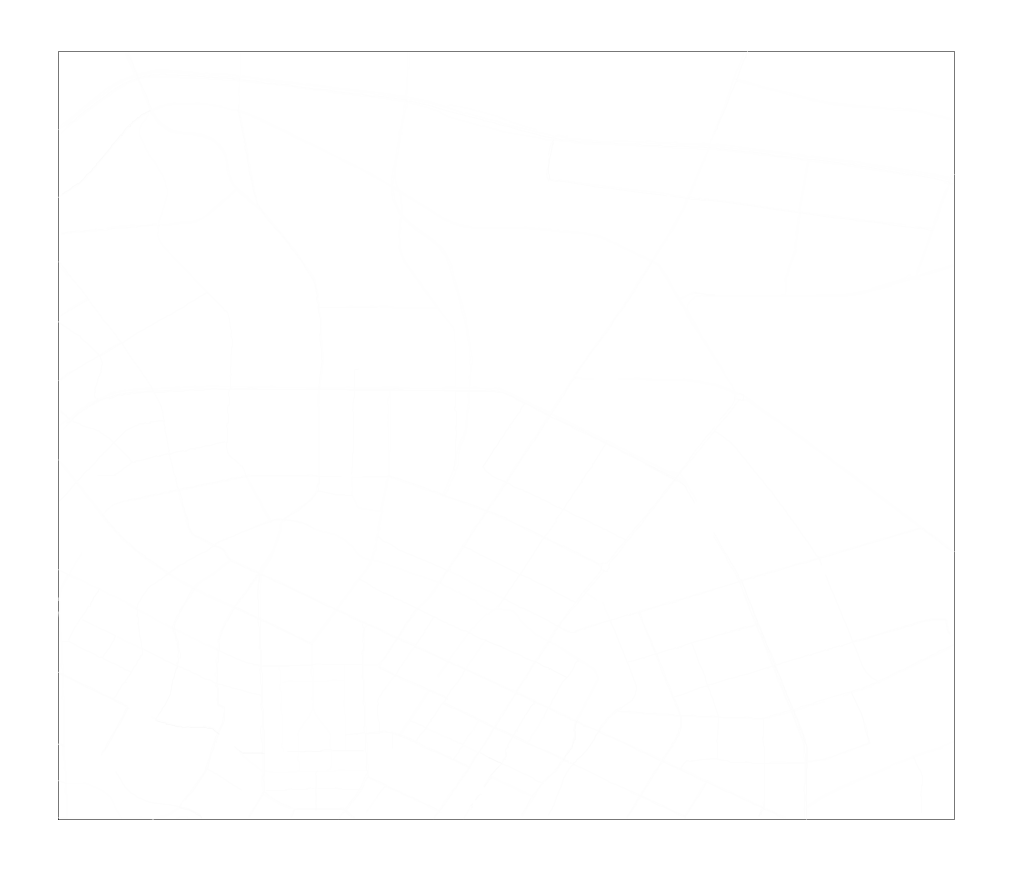

In [34]:

x = [0,0,896,896,0]
y = [0,768,768,0,0]
plt.rcParams['figure.dpi'] = 128
plt.rcParams['savefig.dpi'] = 128
plt.rcParams['figure.figsize']=(7,6)
plt.rcParams['image.cmap'] = 'gray'
plt.figure()
# Use https://tool.oschina.net/hexconvert/ to check the hexadecimal value
# 00 -> 00; 255 -> ff; 30 -> 1e; 225 = e1e1e1
plt.subplots_adjust(left = -0.05, bottom = -0.05, right = 1.05, top = 1.05, hspace = 0, wspace = 0)
plt.plot(x,y,color = '#000000', linewidth = 0.3)
EndNum = Drawdf['Draworder'].iloc[-1]
for i in range(EndNum+1):
    Segment = Drawdf.loc[Drawdf['Draworder'] == i]
    Xpoint = np.array(Segment['Xcoord'])
    Ypoint = np.array(Segment['Ycoord'])
    Spdpixel = Segment['Intspd'].iloc[0]
    hexn = hex(255-int(Spdpixel))
    hexnum = (hexn[2:4] if len(hexn) == 4 else ('0'+hexn[2:3]))

    Plotcolor = str('#'+hexnum+hexnum+hexnum)
  #  Plotcolor = '#000000'
  #  print(Plotcolor)
    plt.plot(Xpoint,Ypoint,color = Plotcolor, linewidth = 0.3)
plt.axis('off')
#plt.show()
plt.savefig('R_part.png')

In [3]:
import turtle as t

In [5]:
t.color('blue')
t.begin_fill
t.circle(100)
t.end_fill()

In [7]:
t.hideturtle()


In [8]:
t.mainloop()

KeyboardInterrupt: 

In [1]:
###Autocad Calibration
import numpy as np
from sklearn.linear_model import LinearRegression
#CAD_coords = np.array([[48252.08,32971.39],[48107.21,32682.49],[48415.06,32684.95],[47757.81,33442.65],[48721.42,33459.92]])
#MAP_coords = np.array([[104.06568,30.662403],[104.064247,30.659953],[104.067406,30.66],[104.060467,30.666796],[104.070638,30.667073]])



In [7]:
#CAD_X = np.array([48252.08,48107.21,48415.06,47757.81,48721.42])
#CAD_Y = np.array([32971.39,32682.49,32684.95,33442.65,33459.92])

#MAP_X = np.array([104.06568,104.064247,104.067406,104.060467,104.070638]).reshape([-1,1])
#MAP_Y = np.array([30.662403,30.659953,30.66,30.666796,30.667073]).reshape([-1,1])

In [8]:
'''CAD_X = np.array([48252.08,48107.21,48415.06,47757.81,48721.42,
                  48233.2,48914.66,50430.9683,50508.6315,
                  47746.09,47755.03,48764.58,49372.09,46941.14,47187.74,49224.95])
CAD_Y = np.array([32971.39,32682.49,32684.95,33442.65,33459.92,
                  33687.28,29751.15,30418.0654,30475.6904,
                  33974.49,34475.47,33818.859,32520.78,29863.52,29721.27,29761.95])



MAP_X = np.array([104.065724,104.064247,104.067406,104.060467,104.070638,
                  104.072896,104.088689,104.089467,
                  104.065504,104.060317,104.060456,104.071078,104.077199,104.052201,104.054851,104.076222]).reshape([-1,1])
MAP_Y = np.array([30.662414,30.659953,30.66,30.666796,30.667073,
                  30.669051,30.6336,30.639729,30.640191,
                  30.671561,30.675962,30.671075,30.658561,30.634477,30.633175,30.633618]).reshape([-1,1])'''

In [14]:
#Let's go along the 1st circle line! 
CAD_X = np.array([48252.08,48107.21,48415.06,47757.81,49224.95,49882.53,50435.6294,50508.6315,50888.12,51145.67,
                  51387.03,50596.41,49951.11,49526.52,50118.22,49009.1719,49338.4,48277.96,48139.16,47862.74,
                  47640.8,46984.05,46336.02,46270.08,45927.16,45862.476,
                  51113.39,51757.8093,52135.88,51770.49,52110.94,51379.81,48721.42])
CAD_Y = np.array([32971.39,32682.49,32684.95,33442.65,29761.95,30118.02,30437.1438,30475.6904,31074.15,31540.69,
                  34015.6,33861.98,35150.81,35313.51,35457.97,35526.8479,36268.05,35311.73,35181.98,35063.63,
                  35558.4,35427.35,35483.38,35129.1,34480.23,33385.2593,
                  33916.57,32862.3970,32845.06,32861.37,32377.89,31975.42,33459.92])

MAP_X = np.array([104.06568,104.064247,104.067406,104.060467,104.076163,104.082955,104.088727,104.089446,104.093437,104.096039,
                  104.098351,104.090216,104.083162,104.078849,104.085055,104.073237,104.076764,104.065767,104.064308,104.061411,
                  104.059051,104.052334,104.045414,104.044754,104.041182,104.040618,
                  104.095422,104.102449,104.106215,104.102471,104.106043,104.098463,104.070638]).reshape([-1,1])
MAP_Y = np.array([30.662403,30.659953,30.66,30.666796,30.633734,30.636845,30.639868,30.640214,30.645609,30.649874,
                  30.67224,30.670878,30.682422,30.683866,30.685167,30.685778,30.692345,30.683672,30.682551,30.681342,
                  30.685845,30.684424,30.684996,30.681804,30.675843,30.666117,
                  30.67141,30.6619,30.661734,30.6619,30.657525,30.653833,30.667073]).reshape([-1,1])

In [15]:
model_X = LinearRegression()
model_Y = LinearRegression()
model_X = model_X.fit(MAP_X, CAD_X)
print(model_X)
model_Y = model_Y.fit(MAP_Y, CAD_Y)
print(model_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [19]:
print('X_intercept:', model_X.intercept_)
# （标量） 系数b0 intercept: 5.633333333333329 -------this will be an array when y is also 2-dimensional
print('X_slope:', model_X.coef_)

print('Y_intercept:', model_Y.intercept_)
# （标量） 系数b0 intercept: 5.633333333333329 -------this will be an array when y is also 2-dimensional
print('Y_slope:', model_Y.coef_)

X_intercept: -9869890.836956542
X_slope: [95306.64835131]
Y_intercept: -3379097.0089559667
Y_slope: [111277.63921403]


In [20]:

long_lowerbound = 104.0402
lati_lowerbound = 30.6516
long_upperbound = 104.1298
lati_upperbound = 30.7284
map_x = np.array([long_lowerbound,long_upperbound]).reshape([-1,1])
map_y = np.array([lati_lowerbound,lati_upperbound]).reshape([-1,1])
CAD_x_pred = model_X.predict(map_x)
print('CAD X predicted segment:', CAD_x_pred, sep='\n')
CAD_y_pred = model_Y.predict(map_y)
print('CAD Y predicted segment:', CAD_y_pred, sep='\n')

CAD X predicted segment:
[45831.91884367 54371.39453595]
CAD Y predicted segment:
[31740.6771768  40286.79986843]
